# Software Analytics Mini Tutorial Part III: Working with Time Series

## Introduction
This series of notebooks are a simple mini tutorial to introduce you to the basic functionality of Jupyter, Python, pandas and matplotlib. The comprehensive explanations should guide you to be able to analyze software data on your own. Therefore, the examples is chosen in such a way that we come across the typical methods in a data analysis. Have fun!

*This is part III: The basic of the time series analysis with pandas.*

## The analysis goal
In this mini tutorial, we want to find out for the Linux kernel software project 
* Question 1: At what hour of the day the commits are made?
* Question 2: At which weekday commits occur?
* Question 3: How the daily progress of the development was?

## The dataset

#### Import dataset
1. import pandas
1. read in `../datasets/git_log_linux_authors_timestamps.gz` into `log`.
1. display the first five entries

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
import pandas as pd
log = pd.read_csv("../datasets/git_log_linux_authors_timestamps.gz")
log.head()

,timestamp,author
0,2017-12-31 14:47:43,Linus Torvalds
1,2017-12-31 13:13:56,Linus Torvalds
2,2017-12-31 13:03:05,Linus Torvalds
3,2017-12-31 12:30:34,Linus Torvalds
4,2017-12-31 12:29:02,Linus Torvalds


## Working with time-based data
Now let's look at the timestamp information.

### Question 1: Daytime of Commits

First, we want to find out at what time of day the developers commit.

#### View timestamp column
1. display the first five entries of the series `timestamp`.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log.timestamp.head()

0    2017-12-31 14:47:43
1    2017-12-31 13:13:56
2    2017-12-31 13:03:05
3    2017-12-31 12:30:34
4    2017-12-31 12:29:02
Name: timestamp, dtype: object

#### Convert to the Timestamp data type

The data type of the `timestamp` series is still* `object` (because it's plain text from the CSV file). To work with the time capabilities of pandas, we need to convert this data to pandas', we need a `Timestamp` data type.


1. use the pandas function `pd.to_datetime` to convert the column `timestamp` into a real date data type.
1. write the result into the new variable `ts` (abbreviation for "timestamp")*.
1. output the first five entries.

**Note: We could have also overridden the `timestamp` series. But to show some pandas functionality, we use a separate Series.*

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
ts = pd.to_datetime(log.timestamp)
ts.head()

0   2017-12-31 14:47:43
1   2017-12-31 13:13:56
2   2017-12-31 13:03:05
3   2017-12-31 12:30:34
4   2017-12-31 12:29:02
Name: timestamp, dtype: datetime64[ns]

##### Discussion
* Was the conversion successful? 
* What could possibly happen during the conversion?
* How could you treat issues that occur?

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

*Possible answers:*

* Conversion was successfull because `dtype` is now `datetime64[ns]`

* Possible issues:
 * There could be data in the column that's not a date format (filter out this data or use `errors` parameter with value `coerce` to convert invalid data to `Nan`)
 * There could be an awkward date format (specify the date format manually)
 * There could only parts be needed
 * Conversion could take a long time (check if you just need a part of the data like the day instead of the additional time and a kind of data index with the help of the `Category` data types of pandas)

#### Work with hourly data
1. access the date object `dt` of the Series `ts`.
2. inspect the hours of the `hour` property of the `dt` object.
3. store the hours into a new Series `hour`

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
hour = ts.dt.hour
hour.head()

0    14
1    13
2    13
3    12
4    12
Name: timestamp, dtype: int64

#### Add a new Series to a DataFrame

1. Add the `hour` Series to the existing `log` DataFrame with the syntax

```python
<DataFrame>['<new Series name>'] = <Series>
```
2. print out the first five entries of `log`.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log['hour'] = hour
log.head()

,timestamp,author,hour
0,2017-12-31 14:47:43,Linus Torvalds,14
1,2017-12-31 13:13:56,Linus Torvalds,13
2,2017-12-31 13:03:05,Linus Torvalds,13
3,2017-12-31 12:30:34,Linus Torvalds,12
4,2017-12-31 12:29:02,Linus Torvalds,12


#### Find out the favorite commit times
1. sum up the number of commits (=rows) for each hour. Switch off the sorting with the parameter `sort=False` to keep the order of the hours.
1. save the result in `commits_per_hour`
1. display the first five entries

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
commits_per_hour = log.hour.value_counts(sort=False)
commits_per_hour.head()

0    19533
1    15044
2    10420
3     7000
4     6068
Name: hour, dtype: int64

#### Visualize the hourly commit result
1. plot a bar chart of the hourly commit counts.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

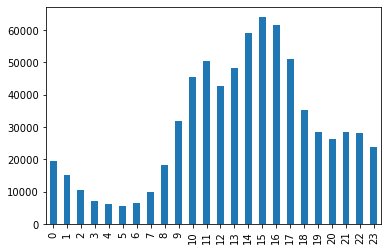

In [ ]:
%matplotlib inline
commits_per_hour.plot.bar();

#### Enhance the visualization

We store the return object of the `bar()` function in the variable `ax`. This is an `Axes` object of the underlying plotting library `matplotlib`, through which we can customize additional properties of the plot.

1. add the title "Commits per Hour" via `set_title("<titel name>")`
1. add the label "Hour of Day" of the X-axis with `set_xlabel("<X-axis label name>")`
1. add the label "Number of Commits" of the Y-axis with `set_ylabel(<"Y-axis label name>")`

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

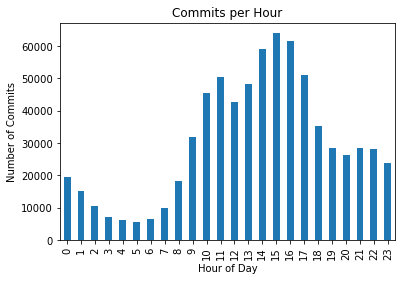

In [ ]:
ax = commits_per_hour.plot.bar()
ax.set_title("Commits per Hour")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Commits");

##### Discussion

* What do you find interesting?
* What could be differences compared to the commit distribution for software systems within a company?

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

*Possible Answers:*

* We haven't considered a possible different commit behavior of the developers, but maybe it doesn't influence the result at all?

### Question 2: Commits per weekday

We can also analyze the commits per weekdays.

#### Retrieve the weekday number

1. store the weekday number into an additional Series `weekday` in `log` by using the `dayofweek` property of `dt` from the `ts` Series
1. store the weekday name into an additional Series `weekday_name` in `log` by using the `day_name()` method of `dt` from the `ts` Series
1. display the first five entries

*Note: The `ts` Series and the `log` DataFrame fit nicely together because the have the same so-called* `index` *(the mechanism that takes care of the order in a DataFrame or Series).*

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log['weekday'] = ts.dt.dayofweek
log['weekday_name'] = ts.dt.day_name()
log.head()

,timestamp,author,hour,weekday,weekday_name
0,2017-12-31 14:47:43,Linus Torvalds,14,6,Sunday
1,2017-12-31 13:13:56,Linus Torvalds,13,6,Sunday
2,2017-12-31 13:03:05,Linus Torvalds,13,6,Sunday
3,2017-12-31 12:30:34,Linus Torvalds,12,6,Sunday
4,2017-12-31 12:29:02,Linus Torvalds,12,6,Sunday


#### Group data

Now it's getting tricky. We need to group the values by the `weekday_name` day names but have also to keep the the order of the data with `weekday`.

1. use `groupby` from the `log` DataFrame to group the list of Series `['weekday', 'weekday_name']`.
1. select just the `timestamp` Series as remaining data
1. aggregate the timestamp values with the `count()` method
1. display all results

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
commits_per_day = log.groupby(['weekday', 'weekday_name'])['timestamp'].count()
commits_per_day

weekday  weekday_name
0        Monday          124296
1        Tuesday         131690
2        Wednesday       131019
3        Thursday        127097
4        Friday          117635
5        Saturday         44877
6        Sunday           46600
Name: timestamp, dtype: int64

#### Partially reset the index

Now we need to just keep the ordered `weekday_name` as index.

1. use the `reset_index` method with `level=0` as parameter to move the first index level back to a normal Series
1. store the new indexed DataFrame into the `commits_per_day_name`
1. display all results

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
commits_per_day_name = commits_per_day.reset_index(level=0)
commits_per_day_name

,weekday,timestamp
weekday_name,,
Monday,0,124296
Tuesday,1,131690
Wednesday,2,131019
Thursday,3,127097
Friday,4,117635
Saturday,5,44877
Sunday,6,46600


#### Plot the commits per weekday

1. plot the Series `timestamp` of `commits_per_day_name` as bar chart.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

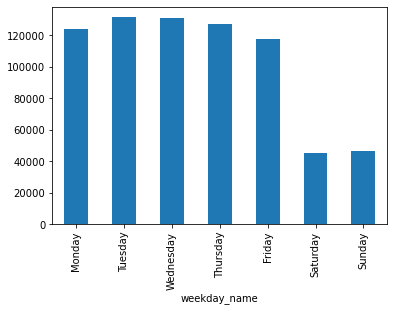

In [ ]:
commits_per_day_name['timestamp'].plot.bar();

### Question 3: Overall daily progress

In the following, we want to see the progress of the number of commits over the last years by using a `DatetimeIndex` based DataFrame. We want to aggregate the number of commits for each day.

#### Create a time-based DataFrame

1. set the `ts` Series from above as index using `set_index(<Series>)`
1. just select the `author` column (we just need one column for the counting later on)
1. store the result in `log_timed`
1. display the five first entries

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log_timed = log.set_index(ts)['author']
log_timed.head()

timestamp
2017-12-31 14:47:43    Linus Torvalds
2017-12-31 13:13:56    Linus Torvalds
2017-12-31 13:03:05    Linus Torvalds
2017-12-31 12:30:34    Linus Torvalds
2017-12-31 12:29:02    Linus Torvalds
Name: author, dtype: object

#### Resample the dataset

1. use the `resample("<time unit>")` function of `log_timed` to group values on a daily basis using `"D"´*
1. count the values per day using the `count()` method
1. store the result in `commits_per_day`
1. display the first five entries

**Other time units are for example months (`M`), quarters (`Q`) or years (`A`).*

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
commits_per_day = log_timed.resample("D").count()
commits_per_day.head()

timestamp
2005-04-16    199
2005-04-17     30
2005-04-18     73
2005-04-19     28
2005-04-20      8
Freq: D, Name: author, dtype: int64

#### Calculate the progress

To show the commit history over time, we calculate the cumulative sum of all daily entries. This sums up all values one after another.

1. use `cumsum()` on `commits_per_day`
1. store the result in `commits_per_day_cumulative`
1. display the first five results



###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
commits_per_day_cumulative = commits_per_day.cumsum()
commits_per_day_cumulative.head()

timestamp
2005-04-16    199
2005-04-17    229
2005-04-18    302
2005-04-19    330
2005-04-20    338
Freq: D, Name: author, dtype: int64

#### Plot the results

1 . plot the results of the accumulated values as a line chart.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

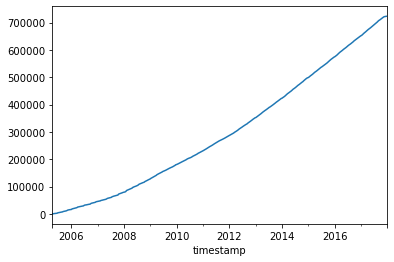

In [ ]:
commits_per_day_cumulative.plot();

# Summary

You've learned some basics about pandas and its usage with software data. This will hopefully get you started in your daily work. Other important topics that are still missing are:

* Reading in complicated or semi-structured data structures
* Merging different data sources with `pd.merge` and `join`
* Transforming data with `pivot_table`

But with the features shown, you are on a good way to become a Software Development Analyst that can leverage Data Science to fix problems in software systems!

If you want to dive deeper into this topic, take a look at my [other blog posts on that topic](http://www.feststelltaste.de/category/software-analytics/). I'm also [offering training for companies](http://markusharrer.de/) who want to fix their problems using data analysis in software development.

If you want to dive deeper into this topic, take a look at my [blog posts on that topic](http://www.feststelltaste.de/category/software-analytics/). I'm looking forward to your comments and feedback on [GitHub](https://github.com/feststelltaste/software-analytics-workshop/issues) or on [Twitter](https://www.twitter.com/feststelltaste)!